In [1]:
!pip install pulp

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 16.6 MB/s eta 0:00:0000:0100:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [2]:
from pulp import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

In [3]:
#a handful of sites
#sites = ['Barcelona','Belgrade','Berlin','Brussels','Bucharest','Budapest','Copenhagen','Dublin','Hamburg','Istanbul','Kiev','London','Madrid','Milan','Moscow','Munich','Paris','Prague','Rome','Saint Petersburg','Sofia','Stockholm','Vienna','Warsaw']
# sites = ['Barcelona','Belgrade','Berlin','Brussels','Bucharest','Budapest','Copenhagen']
latlng = ['latitude', 'longitude']
posit = pd.read_csv('india_city.csv', index_col=None)
#flighttime = pd.read_csv('flight_time.csv', index_col="City")
#distance = pd.read_csv('distance.csv', index_col="City")
#print(len(position["city"]))
position=posit.head(20)
position

,city,lat,lng
0,Delhi,28.6100,77.2300
1,Mumbai,19.0761,72.8775
2,Kolkāta,22.5675,88.3700
3,Bangalore,12.9789,77.5917
4,Chennai,13.0825,80.2750
5,Hyderābād,17.3617,78.4747
6,Pune,18.5203,73.8567
7,Ahmedabad,23.0225,72.5714
8,Sūrat,21.1702,72.8311
9,Lucknow,26.8500,80.9500


In [4]:
site= position["city"]
sites=[]
latitude=[]
longitude=[]
for i in range(len(position["city"])):
    sites.append(str(site[i]))
    latitude.append(position["lat"][i])
    longitude.append(position["lng"][i])
longitude[0]

77.23

In [5]:
#make some positions (so we can plot this)
positions = dict( ( sites[i], (latitude[i],longitude[i]) ) for i in range(len(position["city"])))

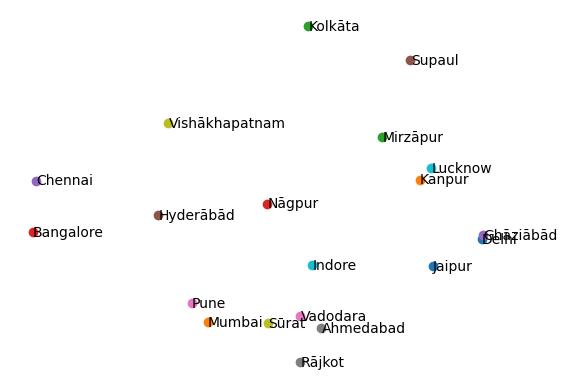

In [6]:
for s in positions:
    p = positions[s]
    plt.plot(p[0],p[1],'o')
    plt.text(p[0]+.01,p[1],s,horizontalalignment='left',verticalalignment='center')
    
plt.gca().axis('off');

In [7]:
import math
import numpy as np

# Define the Haversine function
def haversine(lat1, lon1, lat2, lon2):
    """Calculate the great-circle distance between two points."""
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])
    
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = math.sin(dlat / 2) ** 2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    
    R = 6371.0  # Radius of Earth in kilometers
    distance = R * c
    return distance

# Calculate the distance matrix
def calculate_distance_matrix(coords):
    """Calculate the distance matrix for a list of coordinates."""
    num_cities = len(coords)
    distance_matrix = np.zeros((num_cities, num_cities))
    
    for i in range(num_cities):
        for j in range(i + 1, num_cities):
            lat1, lon1 = coords[i]
            lat2, lon2 = coords[j]
            distance = haversine(lat1, lon1, lat2, lon2)
            distance_matrix[i, j] = distance
            distance_matrix[j, i] = distance  # Distance is symmetric
    
    return distance_matrix

# Example data (replace with actual data)
#sites = [f'City{i}' for i in range(len(position["city"]))]
longitude = [i for i in range(len(position["city"]))]  # Example data
latitude = [i for i in range(len(position["city"]))]   # Example data
#positions_ = dict((sites[i], (longitude[i], latitude[i])) for i in range(len(position["city"])))

# Extract coordinates
coords = [positions[city] for city in sites]

# Calculate the distance matrix
distance_matrix = calculate_distance_matrix(coords)
distance_matrix

array([[   0.        , 1148.51291629, 1302.65988473, 1738.50203006,
        1755.08268728, 1257.19506259, 1173.21519527,  776.62536186,
         938.49444904,  415.1231969 ,  236.54193645,  388.86751063,
         654.65939322,  850.24509973,   19.70587084,  965.7637594 ,
         809.76569682,  954.16975311, 1361.44782767,  669.77889127],
       [1148.51291629,    0.        , 1655.3661365 ,  844.49850876,
        1033.48731023,  621.10582582,  120.18179316,  439.96723335,
         232.90367709, 1195.20669873,  919.85940188, 1120.3257615 ,
        1204.40822473,  687.42547827, 1162.14356311, 1610.94687274,
         360.0470858 ,  419.46205425, 1109.85826376,  508.9178722 ],
       [1302.65988473, 1655.3661365 ,    0.        , 1560.44626604,
        1358.06624058, 1184.59808168, 1575.85084424, 1619.52758942,
        1610.27728478,  887.68481419, 1356.94913558,  920.41670921,
         655.80528178,  971.36849094, 1289.64690174,  434.19187859,
        1558.78487899, 1806.75920271,  756.691

In [8]:
# get distanc between cities
distances = dict( ((sites[i],sites[j]), distance_matrix[i][j] ) for i in range(len(position["city"])) for j in range(len(position["city"])) if i!=j)

## The model

With a few modifications, the original traveling salesman problem can support multiple salesman. Instead of making each facility only be visited once, the origin facility will be visited multiple times. If we have two salesman then the origin is visited exactly twice and so on.

For **K** vehicles or sales people:

### Variables:

$x_{ij}=
\begin{cases}
1: \text{the path goes from city i to j}\\
0: \text{otherwise}
\end{cases}$

### order dummy variables:

$u_i - u_j + C*x_{ij} \leq C - d_j, C = N/K$
$\begin{cases}
u_i: \text{order that site i is visited}\\
d_j: \text{the cost to visit city j}, 0 \leq u_i \leq C - d_j, \forall i \in V \setminus \{0\}
\end{cases}$

### Goal:

$min\sum_{i=0}^{n}\sum_{j\neq{i}, j=0}^{n}{c_{ij}}{x_{ij}}$
$\begin{cases}
c_{ij}: \text{distance from city i to city j}\\
x_{ij}: \text{whether there's a path between i and j}
\end{cases}$

### Constraints:

$\sum_{i\in{V}}{x_{ij} = 1}, \forall j \in V \setminus \{0\}$

$\sum_{j\in{V}}{x_{ij} = 1}, \forall i \in V \setminus \{0\}$

$\sum_{i\in{V}}{x_{i0} = K}$

$\sum_{j\in{V}}{x_{0j} = K}$

In [9]:
K = 4 #the number of sales people 

In [10]:
#create the problme
prob=LpProblem("vehicle", LpMinimize)

In [11]:
#indicator variable if site i is connected to site j in the tour
x = LpVariable.dicts('x',distances, 0,1,LpBinary)
#dummy vars to eliminate subtours
u = LpVariable.dicts('u', sites, 0, len(sites)-1, LpInteger)

In [12]:
#the objective
cost = lpSum([x[(i,j)]*distances[(i,j)] for (i,j) in distances])
prob+=cost

In [13]:
#constraints
for k in sites:
    cap = 1 if k != 'Mumbai' else K
    #inbound connection
    prob+= lpSum([ x[(i,k)] for i in sites if (i,k) in x]) ==cap
    #outbound connection
    prob+=lpSum([ x[(k,i)] for i in sites if (k,i) in x]) ==cap
    
#subtour elimination
N=len(sites)/K
for i in sites:
    for j in sites:
        if i != j and (i != 'Mumbai' and j!= 'Mumbai') and (i,j) in x:
            prob += u[i] - u[j] <= (N)*(1-x[(i,j)]) - 1

Solve it!

In [14]:
%time prob.solve()
#prob.solve(GLPK_CMD(options=['--simplex']))
print(LpStatus[prob.status])

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/23m1505/.local/lib/python3.9/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/cdc84e2df291425193e7f494602edca1-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /tmp/cdc84e2df291425193e7f494602edca1-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 387 COLUMNS
At line 3352 RHS
At line 3735 BOUNDS
At line 4135 ENDATA
Problem MODEL has 382 rows, 399 columns and 1786 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 6985.36 - 0.00 seconds
Cgl0004I processed model has 382 rows, 399 columns (399 integer (380 of which binary)) and 1786 elements
Cbc0038I Initial state - 33 integers unsatisfied sum - 7.7
Cbc0038I Pass   1: suminf.    5.00000 (13) obj. 8516.64 iterations 54
Cbc0038I Pass   2: suminf.    6.93333 (28) obj. 9035.65 iterations 42
Cbc0038I Pass   3: suminf.    7.80000

In [15]:
non_zero_edges = [ e for e in x if value(x[e]) != 0 ]

def get_next_site(parent):
    '''helper function to get the next edge'''
    edges = [e for e in non_zero_edges if e[0]==parent]
    for e in edges:
        non_zero_edges.remove(e)
    return edges

In [16]:
tours = get_next_site('Mumbai')
tours = [ [e] for e in tours ]

for t in tours:
    while t[-1][1] !='Mumbai':
        t.append(get_next_site(t[-1][1])[-1])

The optimal route:

In [17]:
for t in tours:
    print(' -> '.join([ a for a,b in t]+['Mumbai']))

Mumbai -> Bangalore -> Chennai -> Vishākhapatnam -> Hyderābād -> Pune -> Mumbai
Mumbai -> Kanpur -> Lucknow -> Ghāziābād -> Delhi -> Jaipur -> Mumbai
Mumbai -> Nāgpur -> Kolkāta -> Supaul -> Mirzāpur -> Indore -> Mumbai
Mumbai -> Rājkot -> Ahmedabad -> Vadodara -> Sūrat -> Mumbai


Calculate total time:

In [18]:
#totalTime = 0;
#for t in tours:
#    time = 0
 #   for i in range(0, len(t)):
 #       time += flighttime.loc[t[i][0], t[i][1]]
#         print(flighttime.loc[t[i][0], t[i][1]])
#     print(time)
 #   if time > totalTime:
 #       totalTime = time
#print(totalTime)

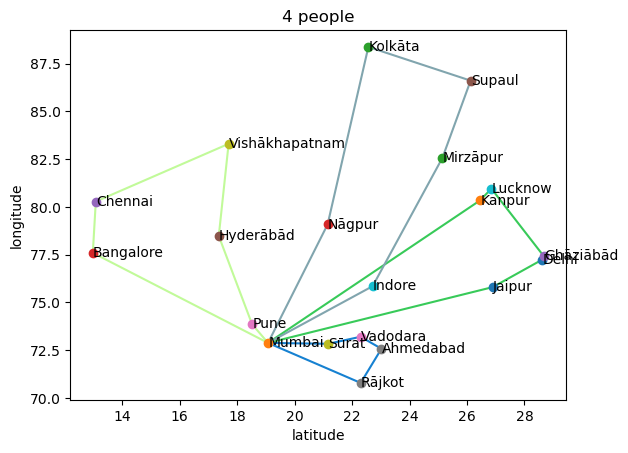

In [ ]:
#draw the tours
colors = [np.random.rand(3) for i in range(len(tours))]
for t,c in zip(tours,colors):
    for a,b in t:
        p1,p2 = positions[a], positions[b]
        plt.plot([p1[0],p2[0]],[p1[1],p2[1]], color=c)

#draw the map again
for s in positions:
    p = positions[s]
    plt.plot(p[0],p[1],'o')
    plt.text(p[0]+.01,p[1],s,horizontalalignment='left',verticalalignment='center')
    
plt.title('%d '%K + 'people' if K > 1 else 'person')
plt.xlabel('latitude')
plt.ylabel('longitude')
# plt.gca().axis('off')
plt.show()

In [20]:
#print('Longest time spent:', totalTime, '(min)')
print('Total distance:', value(prob.objective), '(km)')

Total distance: 10497.700327091168 (km)
